In [22]:
import pickle
import tqdm
import numpy as np
from PIL import Image
import imageio
import os
from changepoint_aug.density_estimation.utils import make_env

In [35]:
data_f = "/scr/aliang80/changepoint_aug/changepoint_aug/density_estimation/datasets/augment_dataset_lam-1.3_nap-2_nes-50_nps-2_rwd-False_sel-per_traj_selm-influence_function_tns-100.pkl"
with open(data_f, "rb") as f:
    data = pickle.load(f)

print(data["metadata"])
print(len(data["rollouts"]))

num_expert_steps_aug = data["metadata"]["config"]["num_expert_steps_aug"]
config = data["metadata"]["config"]

# split rollouts
aug_rollouts = [data["rollouts"][i:i+num_expert_steps_aug] for i in range(0, len(data["rollouts"]), num_expert_steps_aug)]
print(len(aug_rollouts))

env = make_env(
    config["env"],
    config["env_id"],
    config["seed"],
    max_episode_steps=config["max_episode_steps"],
)
obs, _ = env.reset(seed=config["seed"])

imgs = []
for rollout in tqdm.tqdm(aug_rollouts[:100]):
    transition = rollout[0]
    state = transition[0]
    state = np.concatenate([v for k, v in state.items() if k != "achieved_goal"])
    obs, _ = env.reset_to_state(state)
    img = env.render()
    imgs.append(img)

    for transition in rollout:
        action = transition[2]
        env.step(action)
        img = env.render()
        imgs.append(img)


{'density_model_ckpt_path': '', 'model_ckpt_path': PosixPath('/scr/aliang80/changepoint_aug/changepoint_aug/density_estimation/ray_results/i005_bc_200/i005_bc_200_nt-100_s-0/model_ckpts/epoch_180.pkl'), 'num_transitions': 3400, 'config': {'augment_data_file': '', 'augmentation_data_files': [], 'batch_size': 128, 'ckpt_dir': 'model_ckpts', 'ckpt_step': 180, 'cond_dim': 2, 'data_dir': '/scr/aliang80/changepoint_aug/changepoint_aug/density_estimation/datasets', 'data_file': 'sac_maze_200.pkl', 'density_ckpt_step': 950, 'density_exp_name': 'i006_cvae', 'density_model_ckpt': 'nt-200', 'disable_tqdm': False, 'env': 'MAZE', 'env_id': 'button-press-v2', 'exp_name': 'i005_bc_200', 'group_name': '', 'hidden_size': 128, 'inf_fn_lambda': 0.01, 'kl_annealing': True, 'kl_div_weight': 0.5, 'lamb': 1.3, 'latent_size': 8, 'load_from_ckpt': '/scr/aliang80/changepoint_aug/changepoint_aug/density_estimation/ray_results/i005_bc_200/i005_bc_200_nt-100_s-0/model_ckpts/epoch_180.pkl', 'lr': 0.0003, 'max_episo

100%|██████████| 68/68 [00:41<00:00,  1.66it/s]


In [36]:
# make a video of the images
video_f = "/scr/aliang80/changepoint_aug/changepoint_aug/density_estimation/datasets/augmentations.mp4"
imageio.mimsave(video_f, imgs, fps=10)

(100000, 2)


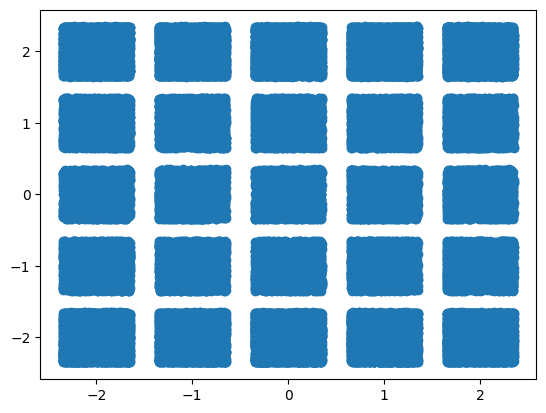

In [12]:
import pickle
dataset_f = "/scr/aliang80/changepoint_aug/changepoint_aug/density_estimation/datasets/sac_maze_random_states_100000.pkl"
with open(dataset_f, "rb") as f:
    dataset = pickle.load(f)

import matplotlib.pyplot as plt 
obss = dataset[:, :2]
print(obss.shape)
plt.scatter(obss[:, 0], obss[:, 1], marker="o")